2024-07-28 16:45:26.405780: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-28 16:45:26.406994: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 16:45:26.430213: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 16:45:26.430247: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 16:45:26.430268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4162 - categorical_accuracy: 0.4903 - val_loss: 1.2112 - val_categorical_accuracy: 0.5722
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0611 - categorical_accuracy: 0.6257 - val_loss: 1.0807 - val_categorical_accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8835 - categorical_accuracy: 0.6910 - val_loss: 1.0179 - val_categorical_accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7500 - categorical_accuracy: 0.7365 - val_loss: 0.9063 - val_categorical_accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6285 - categorical_accuracy: 0.7786 - val_loss: 0.9229 - val_categorical_accuracy: 0.6935
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5095 - categorical_accuracy: 0.8222 - val_loss: 0.9224 - val_categorical_accuracy:

KeyError: 'accuracy'

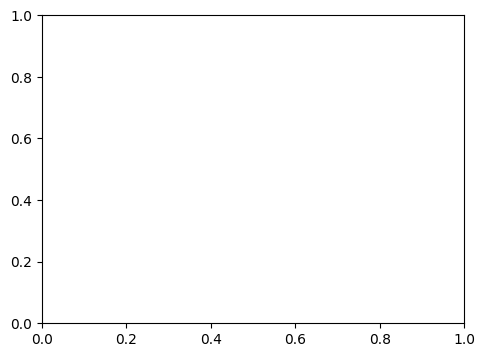

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train/255, x_test/255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create the model
def create_keras_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(20, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(50, (5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# Create and compile the model
model = create_keras_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Train the model.
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()